# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 

## Homework 2  AC 209 : Linear and k-NN Regression


**Harvard University**<br/>
**Fall 2019**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, Chris Tanner

<hr style="height:2pt">


In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

### INSTRUCTIONS

- To submit your assignment follow the instructions given in canvas.
- As much as possible, try and stick to the hints and functions we import at the top of the homework, as those are the ideas and tools the class supports and is aiming to teach. And if a problem specifies a particular library you're required to use that library, and possibly others from the import list.
- Restart the kernel and run the whole notebook again before you submit. 
- Please use .head() when viewing data. Do not submit a notebook that is excessively long because output was not suppressed.

<hr style="height:2pt">

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.api import OLS
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<hr style="height:2pt">
<hr style="height:2pt">

<div class='theme'> <b>Linear Regression and Confidence Intervals</b> </div>

In this part of the homework, you will see how *uncertainty* in the $\beta$ coefficients can directly impact our ability to make predictions with a linear regression model and how in general we can do inference on the predictors. 

The data for this supplement are imported for you in the cells below.

First a little review. The linear model assumes:
$$ y_i \sim N(\beta_0+\beta_1 x_i,\sigma^2 )   $$

This means, pun intended, that $ \mu_{y_i} = \beta_0+\beta_1 x_i $, which can be estimated with $ \hat{\mu}_{y_i} = \hat{\beta}_0+\hat{\beta}_1 x_i $.

And for a new observation not in the data set, once we measure the new predictor value, $x^*$, we can predict its response, $y^*$, from our model as:
$$\hat{y}^* = \hat{\mu}_{y_i} + \hat{\varepsilon}^* $$

Which can be calculated by using the estimate for $\hat{\mu}_{y_i}$ and adding on a randomly selected value for $\hat{\varepsilon}^*$ from its assumed (and estimated) distribution, $N(0,\hat{\sigma}^2)$.


In [3]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("data/cleaned_mtcars.csv")
df.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
y = df[['mpg']].values
X = df[['cyl','disp','hp','wt','qsec']]


X = sm.add_constant(X)

---- 


<div class='exercise'> <b> Question 1 [20 pts] </b> </div>

**1.1** Fit a simple linear regression model predicting `mpg` via `disp`. Use the `FittedOLS.get_prediction().summary_frame()` method to access the confidence intervals for our true mean predictions at various values of `disp` and make a well-labeled plot showing
 1. The observed values of `disp` and `mpg`.
 2. The estimated regression line.
 3. The upper and lower bounds of the 95% confidence interval for the true average (not the observed) `mpg` at any given displacement.
 
**1.2** Why do we have a confidence interval for our true mean prediction values?  Why isn't the mean prediction just a single number?

**1.3** Someone asks what mean `mpg` you would predict for a `disp` value of 400. What do you tell them?  Pay attention to the confidence interval (in 1.1) above.

**1.4** Why does the 95% confidence interval for the mean predicted `mpg` appear to curve as we move away from the data's center? 

**1.5** An alternative way to produce the confidence intervals from 1.1 is through the bootstrap though takes some care.  Create 500 bootstrap samples in order to create 500 bootstrapped regression models and store their estimated intercept and slope values.  Use these bootstrapped estimates to build the 95\% confidence intervals as in 1.1, and recreate the plot from that question with your new bootstrapped confidence intervals.  Compare this new plot to the one from 1.1.

**1.6** Another interval of uncertainty in a regression model is called a *prediction interval*.  A prediction interval gives a range of plausible values for a future individual observation, $\hat{y}^*$, given a specific value of $x$ in general (`disp` here).  How should the 95\% prediction interval calculated at a `disp` value of 400 compare to the corresponding 95\% confidence interval for the mean predicted `mpg`?  Justify with a few sentences.

### Answers

**1.1 Fit a simple linear regression model predicting `mpg` via `disp`. Use the `FittedOLS.get_prediction().summary_frame()` method to access the confidence intervals for our true mean predictions at various values of `disp` and make a well-labeled plot showing**
 1. The observed values of `disp` and `mpg`.
 2. The estimated regression line.
 3. The upper and lower bounds of the 95% confidence interval for the true average (not the observed) `mpg` at any given displacement.

x: <class 'numpy.ndarray'> (32, 1)
y: <class 'numpy.ndarray'> (32, 1)


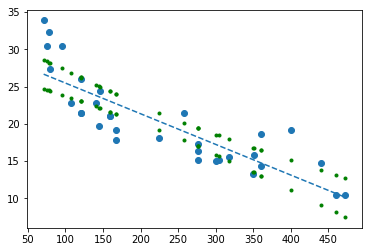

In [5]:
# your code here 
x = np.array(X.disp)
x = x.reshape(x.shape[0], 1)
print('x:', type(x), x.shape)
print('y:', type(y), y.shape)

OLSModel = sm.OLS(y, sm.add_constant(x))
OLSModel_Fit = OLSModel.fit()
beta0 = OLSModel_Fit.params[0]
beta1 = OLSModel_Fit.params[1]
OLSModel_Fit.summary()
plt.scatter(x,y)
x_fit = np.array([[np.min(x), np.max(x)]]).T
plt.plot(x_fit, beta0 + beta1*x_fit, '--')

plt.scatter(x, OLSModel_Fit.get_prediction().summary_frame()['mean_ci_lower'], marker='.', color='green')
plt.scatter(x, OLSModel_Fit.get_prediction().summary_frame()['mean_ci_upper'], marker='.', color='green')

**1.2 Why do we have a confidence interval for our true mean prediction values?  Why isn't the mean prediction just a single number?**



*your answer here*

The mean prediction should include information about how well the model fits the trainding data, and therefore how well we can expect it to predict the estimated value. We provide a 95% confidence interval on the mean value.

**1.3 Someone asks what mean `mpg` you would predict for a `disp` value of 400. What do you tell them?  Pay attention to the confidence interval (in 1.1) above.**

In [41]:
# your code here
beta0 + beta1*400

13.113806771049507

*your answer here*

I would say the mean value is 13.1mpg +/- 2mpg with a confidence interval of 95%. The actual predicted value can be much higher or lower depending on the observation.

**1.4 Why does the 95% confidence interval for the mean predicted `mpg` appear to curve as we move away from the data's center?**

*your answer here*

The confidence interval is a sum of the intercept CI and the slope CI. As the slope changes across the confidence interval it will have a larger affect on the points farther away from the mean. 

**1.5 An alternative way to produce the confidence intervals from 1.1 is through the bootstrap though takes some care.  Create 500 bootstrap samples in order to create 500 bootstrapped regression models and store their estimated intercept and slope values.  Use these bootstrapped estimates to build the 95\% confidence intervals as in 1.1, and recreate the plot from that question with your new bootstrapped confidence intervals.  Compare this new plot to the one from 1.1.**

In [ ]:
# your code here

*your answer here*

They will be roughtly equivalent. 

**1.6 Another interval of uncertainty in a regression model is called a *prediction interval*.  A prediction interval gives a range of plausible values for a future individual observation, $\hat{y}^*$, given a specific value of $x$ in general (`disp` here).  How should the 95\% prediction interval calculated at a `disp` value of 400 compare to the corresponding 95\% confidence interval for the mean predicted `mpg`?  Justify with a few sentences.**

*your answer here*

The prediction interval will be larger than the confidence interval. The confidence interval above only gives the confidence of a mean of samples at the given value. However, the prediction interval includes observation scatter. The observation CI at disp value of 400 is 6.18 <-> 20.05.

In [42]:
OLSModel_Fit.get_prediction().summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,23.005436,0.664391,21.648568,24.362303,16.227868,29.783003
1,23.005436,0.664391,21.648568,24.362303,16.227868,29.783003
2,25.148622,0.815316,23.483523,26.813720,18.302683,31.994561
3,18.966354,0.588977,17.763503,20.169205,12.217933,25.714774
4,14.762412,0.837509,13.051990,16.472833,7.905308,21.619515
5,20.326453,0.575413,19.151302,21.501604,13.582915,27.069991
6,14.762412,0.837509,13.051990,16.472833,7.905308,21.619515
7,23.553597,0.697931,22.128231,24.978963,16.761985,30.345209
8,23.796766,0.714068,22.338445,25.255087,16.998161,30.595371
9,22.692201,0.647172,21.370498,24.013903,15.921586,29.462815
